# Model configuration summary

**Control run name**: Southern Shelf  + Drake Passage

**Perturbation run name**: Southern Shelf + Drake Passage + Northern Weddell Ridge

**Key**:<br/>
SS: Southern Shelf<br/>
DP: Drake Passage<br/>
NWR: Northern Weddell Ridge<br/>

**Goal**: To isolate the impact of the northern Weddell Ridge, when constant heat fluxes are imposed along the shelf.

**Model Config**:<br/>

|       Parameter      |      Value     |                    Description                    |
|:--------------------:|:--------------:|:-------------------------------------------------:|
|         $L_x$        |     4000 km    |                 Zonal domain dize                 |
|         $L_x$        |     2500 km    |               Meridonial domain size              |
|          $H$         |     4000 m     |                   Maximum ocean depth             |
| $\Delta x, \Delta y$ |   $\sim$10 km  |                Horizontal grid spacing            |
|      $\Delta t$      |      617 s     |                   Time step size                  |
|      $\Delta z$      |   10$-$100 m   |                 vertical grid spacing             |
|         $L_r$        |     100 km     |    Meridional width of northern<br>sponge layer   |
|       $\tau_r$       |     7 days     | Relaxation time scale of<br>northern sponge layer |
|    $\Theta_{AABW}$   | -1 $^{\circ}$C |             Temperature of AABW source            |
|      $X_{AABW}$      |     -500 km    |        Location of AABW source<br>on shelf        |
|   $\Delta X_{AABW}$  |     400 km     |          Width of AABW source<br>on shelf         |
|   (To be continued)  |                |                                                   |

# Analysis set-up

In [1]:
import numpy as np
import helper_functions as hf
import plot_functions as pf
import matplotlib.pylab as plt
import overturning_funcs as of
import imp
import xarray as xr
import os
imp.reload(hf)
imp.reload(pf)
imp.reload(of)


# Set directory
exp_dir = '/central/groups/AndyThompsonGroup/earlew/MITgcm_PG/experiments/'  # For HPC
#exp_dir = '/Users/ewilson/research/modeling/MITgcm_PG/experiments'  # Office iMac mirror
hf.set_exp_dir(exp_dir)

In [2]:
# define general plotting and analysis parameters
exp_names = ['gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2', 'gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2']
exp_names_alias = ['SS+DP', 'SS+DP+NWR']
fz = 14  # fontsize
tr = [120, 120] # year range for averaging

# Bathymetry and forcing

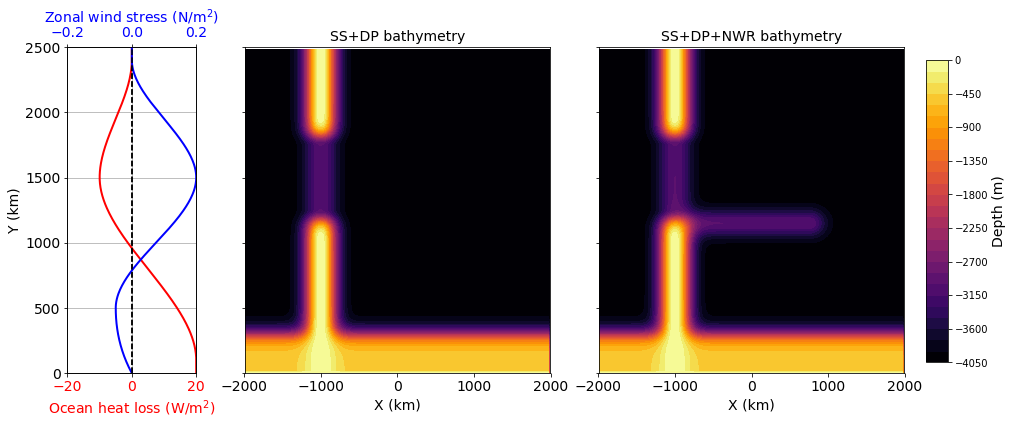

In [4]:
imp.reload(pf)
pf.plot_bathy_tau_surfq_v2(exp_names, exp_names_alias, fz=14, xlim1=[-20, 20], xlim2=[-0.2, 0.2], save_plots=True)

In [6]:
##--------Uncomment below to get bathymetry map without forcing------------##
# imp.reload(pf)
# pf.plot_bathy_2D(exp_names, exp_names_alias)

In [7]:
##--------Uncomment below to get 3D bathymetry plots------------##
#imp.reload(pf)
#pf.plot_bathy_3D(exp_names_list, exp_names_alias, save_plots=False)

# Accessment of model equilibrium

### Domain-averaged temperature

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2...
Loading gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2...


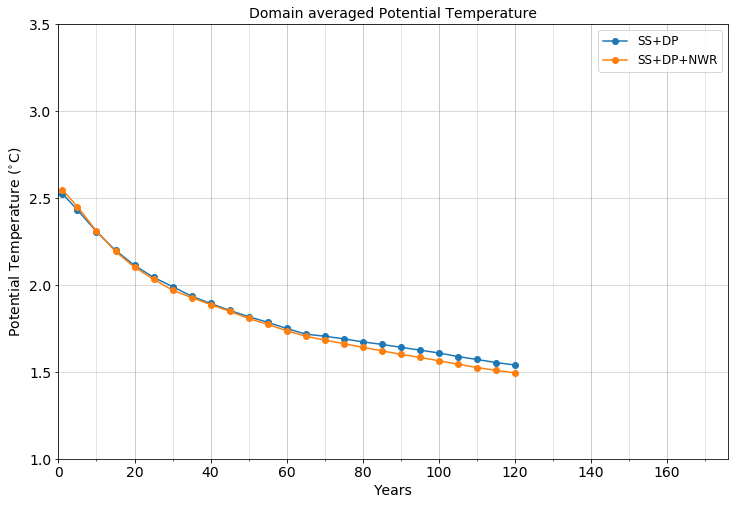

In [3]:
imp.reload(pf)
pf.plot_mean_temp_series(exp_names, exp_names_alias, suppress_err_msg=True)

Comment:

### Domain-averaged bottom temperature

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2...
Loading gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2...


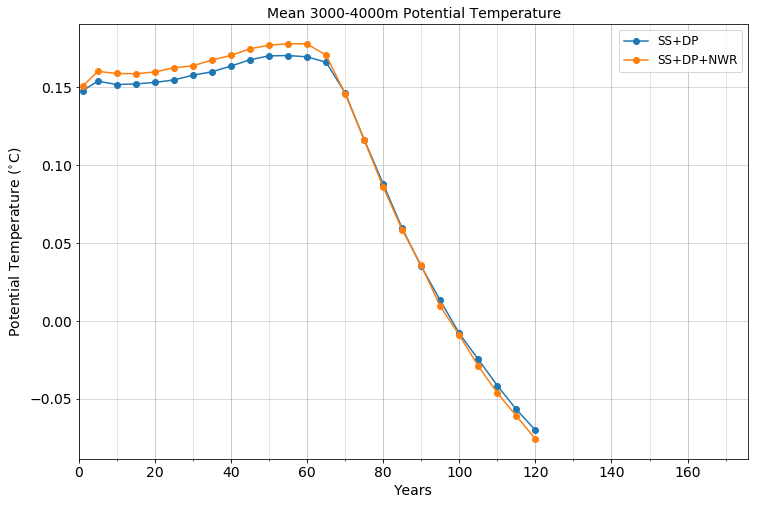

In [4]:
imp.reload(pf)
pf.plot_mean_temp_series(exp_names, exp_names_alias=exp_names_alias, zr=[-4000, -3000], suppress_err_msg=True)

comment...

### Upper ocean temperature

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2...
Loading gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2...


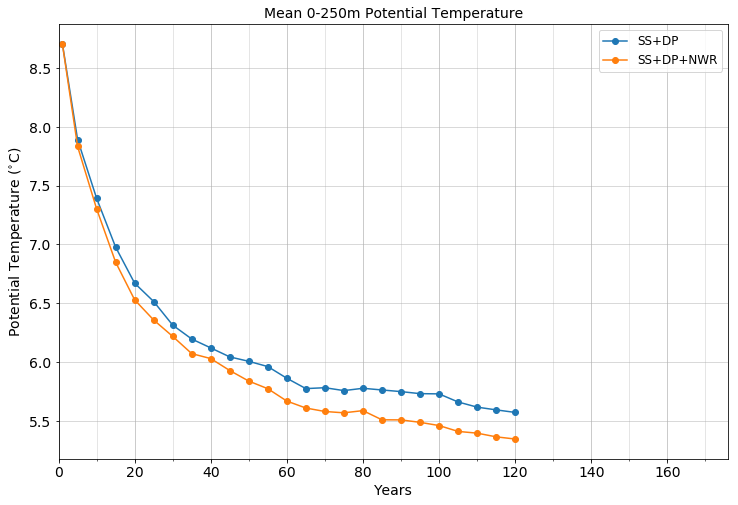

In [5]:
imp.reload(pf)
pf.plot_mean_temp_series(exp_names, exp_names_alias=exp_names_alias, zr=[-250, 0], suppress_err_msg=True)

### Domain-averaged kinetic energy

computing domain-average temps. May take a while...
Loading gyre_ctrl_run_128n_SS_WAP_DP_AABW_mode2...
Loading gyre_ctrl_run_128n_SS_WAP_DP_NWR_AABW_mode2...


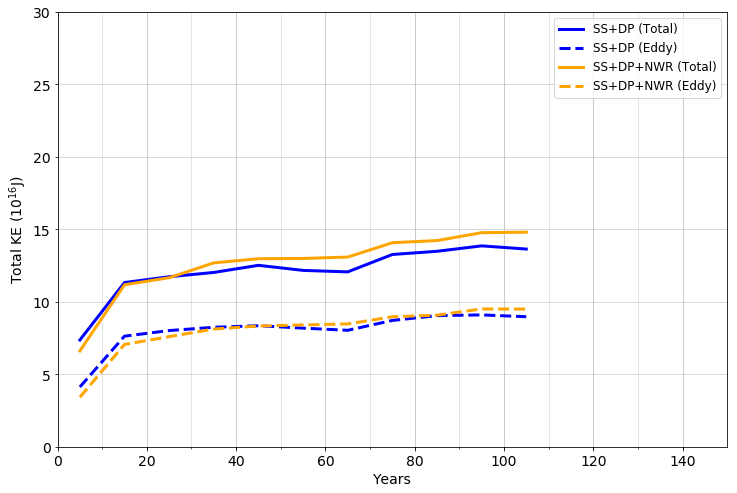

In [19]:
imp.reload(pf)
pf.plot_TKE_series(exp_names, exp_names_alias, tstep=2, suppress_err_msg=True)

comment...

# Layer-averaged properties 

The plots below represent an average of the most recent 10 years (relative to the shorter time series).

### Near-surface temperature

Loading THETA for years 120-120...
Loading THETA for years 120-120...


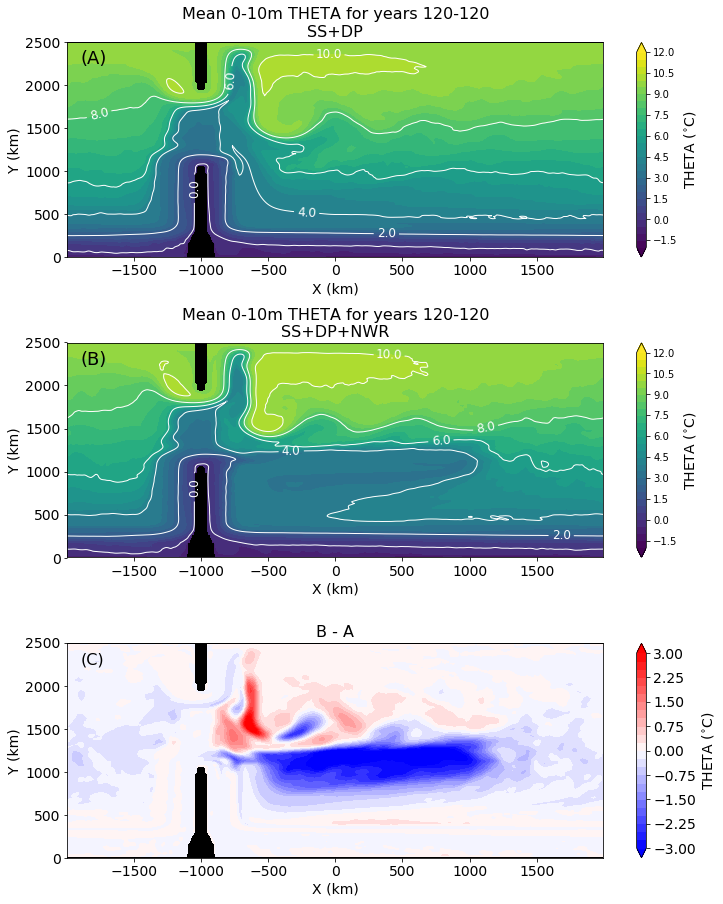

In [7]:
imp.reload(hf)
imp.reload(pf)
zr = [0, 10]
clvls = np.arange(-2, 12.01, 0.5)
clvls_ano = np.arange(-3.0, 3.1, 0.25)
vname = 'THETA'
pf.plot_layer_avg_anom(exp_names, vname, zr=zr, tr=tr, plot_prtb=True,
                       exp_names_alias=exp_names_alias, clvls=clvls, clvls_ano=clvls_ano, fz=14)

## Surface water-mass transformation

Loading THETA for years 120-120...


/central/home/earlew/research/scripts/MITgcm_py/plot_functions.py:1139: UserWarning: Warning: converting a masked element to nan.
  wmt_surf[jj] = np.ma.sum(DA_pt*dpt_qsurf*DZ0_pt)/dpt


Loading THETA for years 120-120...


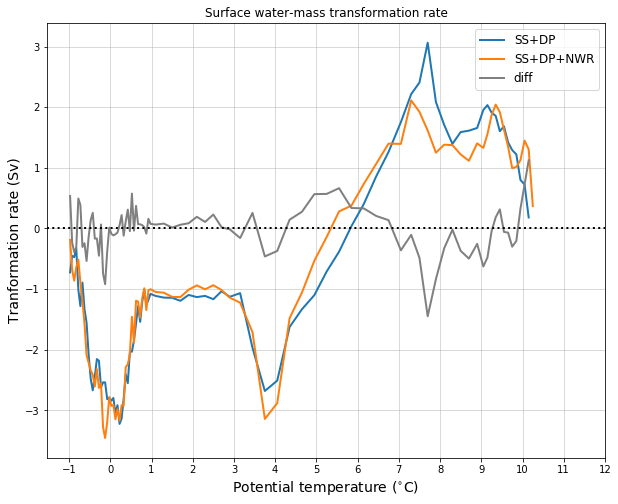

In [7]:
imp.reload(pf)
pf.plot_surf_wmt(exp_names, tr=tr, exp_names_alias=exp_names_alias, use_inst_temp=False)

...

In [13]:
##------------uncomment below for temp average between 200-400 m----------------##
# imp.reload(hf)
# imp.reload(pf)
# zr = [200, 400]
# clvls = np.arange(-0, 10.01, 0.5)
# clvls_ano = np.arange(-3.0, 3.1, 0.25)
# vname = 'THETA'
# pf.plot_layer_avg_anom(exp_names, vname, tr, zr, 
#                        exp_names_alias=exp_names_alias, clvls=clvls, clvls_ano=clvls_ano, fz=14)

### Bottom temperatures

Loading THETA for years 120-120...
Loading THETA for years 120-120...


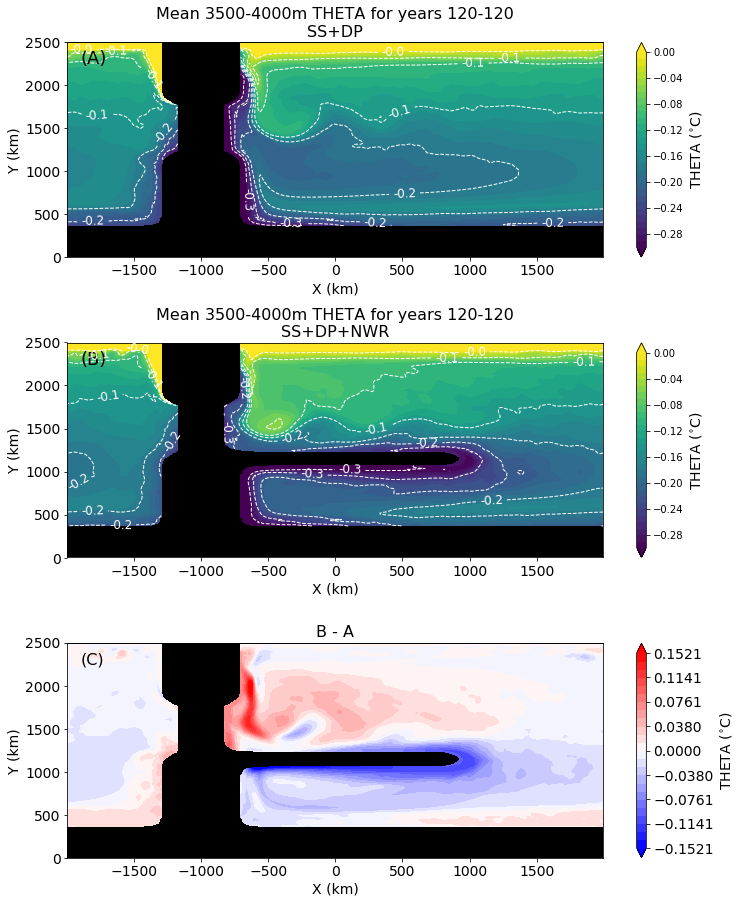

In [8]:
##------------uncomment below for temp average between 3500-4000 m----------------##
imp.reload(hf)
imp.reload(pf)
zr = [3500, 4000]
clvls = np.arange(-0.3, 0.01, 0.01)#np.arange(-0.06, 0.061, 0.005)
clvls_ano = []
vname = 'THETA'
pf.plot_layer_avg_anom(exp_names, vname, zr=zr, tr=tr, plot_prtb=True,
                       exp_names_alias=exp_names_alias, clvls=clvls, clvls_ano=clvls_ano, fz=14)

comment...

### Sea surface height

Loading PHIHYD for years 120-120...
Loading THETA for years 120-120...
Loading PHIHYD for years 120-120...


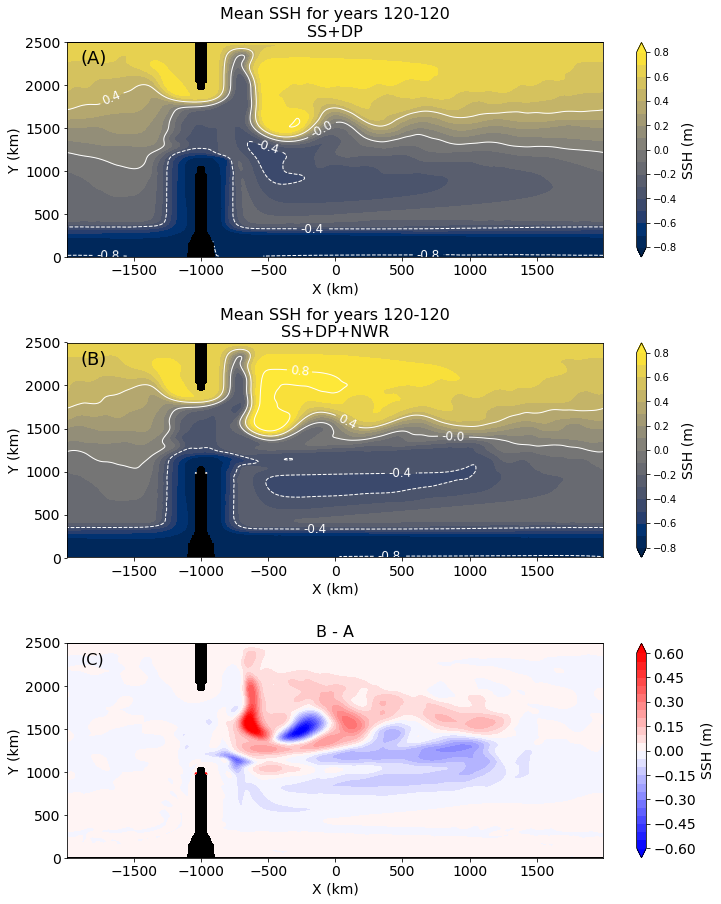

In [13]:
imp.reload(hf)
imp.reload(pf)
zr = [0, 10]
clvls = np.arange(-0.8, .801, 0.1)
clvls_ano = np.arange(-0.6, 0.61, 0.05)
vname = 'SSH'
pf.plot_layer_avg_anom(exp_names, vname, zr=zr, tr=tr, exp_names_alias=exp_names_alias, plot_prtb=True,
                       clvls=clvls, clvls_ano=clvls_ano, cmap=plt.cm.cividis, fz=14)

comment...

### Barotropic Streamfunction

Loading UVEL for years 120-120...
Loading THETA for years 120-120...
Loading UVEL for years 120-120...
Loading THETA for years 120-120...
Loading THETA for years 120-120...


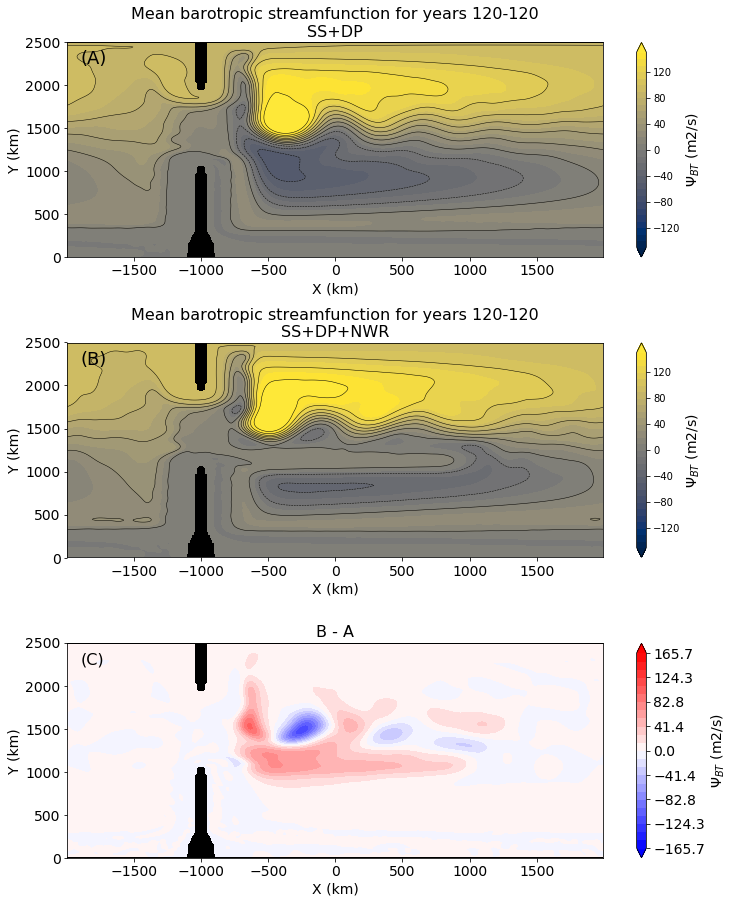

In [12]:
imp.reload(hf)
imp.reload(pf)
clvls = np.arange(-150, 150.1, 10)
# clvls_ano = np.arange(-0.6, 0.61, 0.05)
pf.plot_BT_streamfunction(exp_names, tr=tr, exp_names_alias=exp_names_alias, 
                       clvls=clvls, clvls_ano=[], cmap=plt.cm.cividis, fz=14)

# Zonal sections

### Full zonal mean UVEL

Loading UVEL for years 120-120...
Loading UVEL for years 120-120...


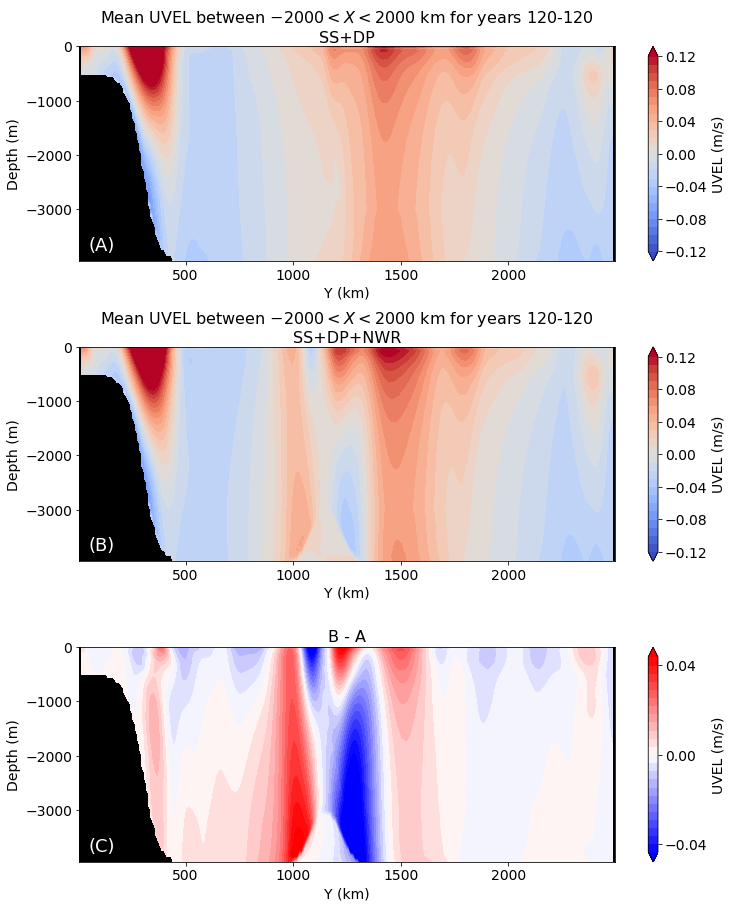

In [14]:
imp.reload(pf)
imp.reload(hf)
#tr = [89, 91]
xr = [-2000e3, 2000e3]
clvls = np.arange(-0.12, 0.1201, 0.01)
vname = 'UVEL'
pf.plot_zonal_sect_anom(exp_names, vname, xr=xr, tr=tr, exp_names_alias=exp_names_alias,  plot_prtb=True, 
                        clvls=clvls, clvls_ano=[], cmap=plt.cm.coolwarm, fz=14)

### Zonal velocity across the "Atlantic" sector

Loading UVEL for years 120-120...
Loading UVEL for years 120-120...


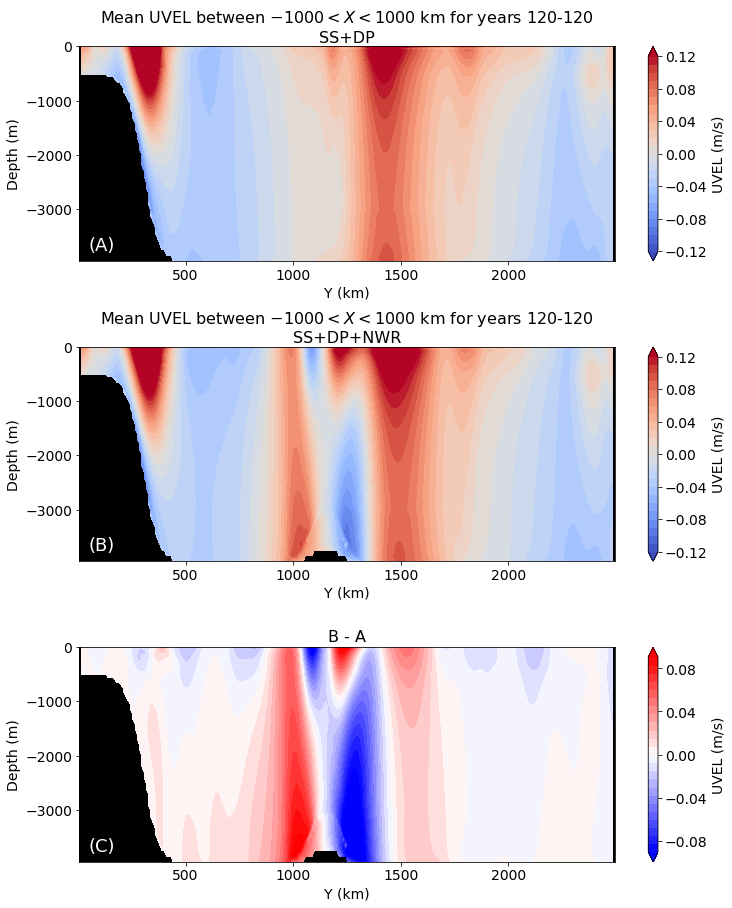

In [15]:
imp.reload(pf)
imp.reload(hf)
#tr = [89, 91]
xr = [-1000e3, 1000e3]
clvls = np.arange(-0.12, 0.1201, 0.01)
vname = 'UVEL'
pf.plot_zonal_sect_anom(exp_names, vname, xr=xr, tr=tr, exp_names_alias=exp_names_alias, plot_prtb=True, 
                        clvls=clvls, clvls_ano=[], cmap=plt.cm.coolwarm, fz=14)

comment...

In [46]:
##------------uncomment below to show meridional velocities across the atlantic sector----------------##
# imp.reload(pf)
# imp.reload(hf)
# #tr = [89, 91]
# xr = [-500e3, 500e3]
# clvls = np.arange(-0.05, 0.05, 0.005)
# vname = 'VVEL'
# pf.plot_zonal_sect_anom(exp_names, vname, tr, xr, exp_names_alias=exp_names_alias, 
#                         clvls=clvls, clvls_ano=[], cmap=plt.cm.coolwarm, fz=14)

### Full zonal mean temperature stratification

Loading THETA for years 120-120...
Loading THETA for years 120-120...


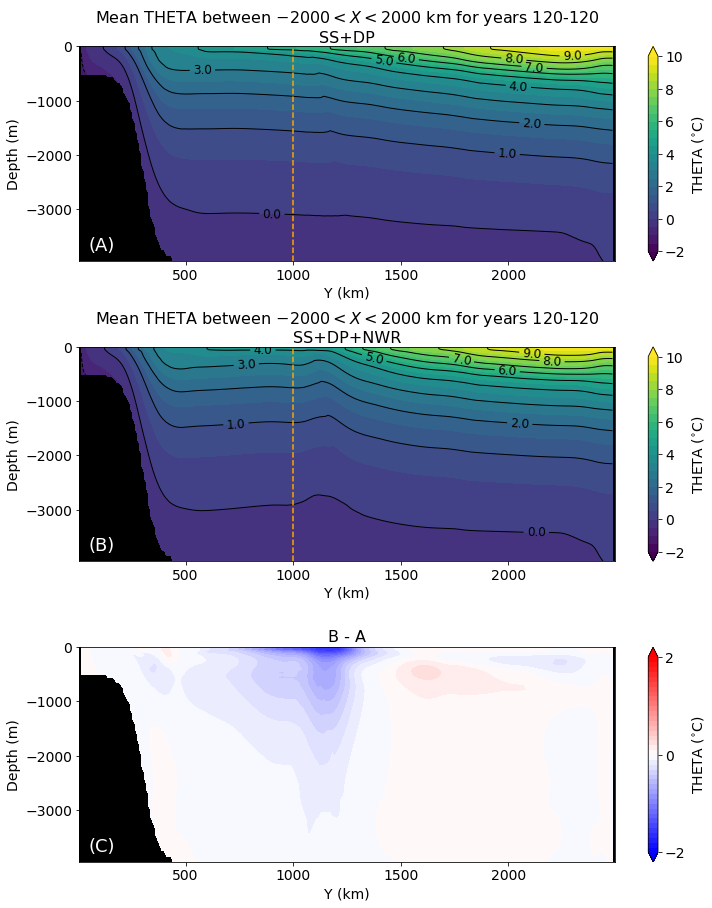

In [16]:
imp.reload(hf)
imp.reload(pf)

#tr = [89, 91]
xr = [-2000e3, 2000e3]
clvls = np.arange(-2, 10.01, 0.5)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'
pf.plot_zonal_sect_anom(exp_names, vname, xr=xr, tr=tr, clvls=clvls, exp_names_alias=exp_names_alias, 
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14, plot_prtb=True, plot_MLD=False)

### Temperature stratification across the "Atlantic" sector

Loading THETA for years 120-120...
Loading THETA for years 120-120...


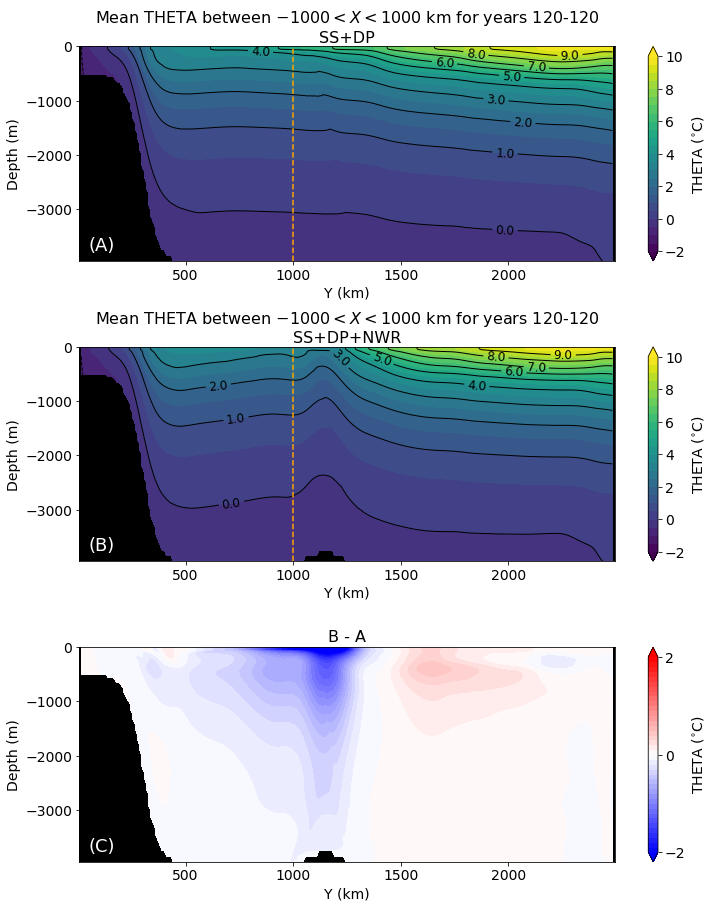

In [17]:
imp.reload(hf)
imp.reload(pf)

#tr = [89, 91]
xr = [-1000e3, 1000e3]
clvls = np.arange(-2, 10.01, 0.5)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'
pf.plot_zonal_sect_anom(exp_names, vname, xr=xr, tr=tr, clvls=clvls, exp_names_alias=exp_names_alias, 
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14, plot_prtb=True, plot_MLD=False)

comment...

### Temperature stratification across the "Pacific" sector

Loading THETA for years 120-120...
Loading THETA for years 120-120...


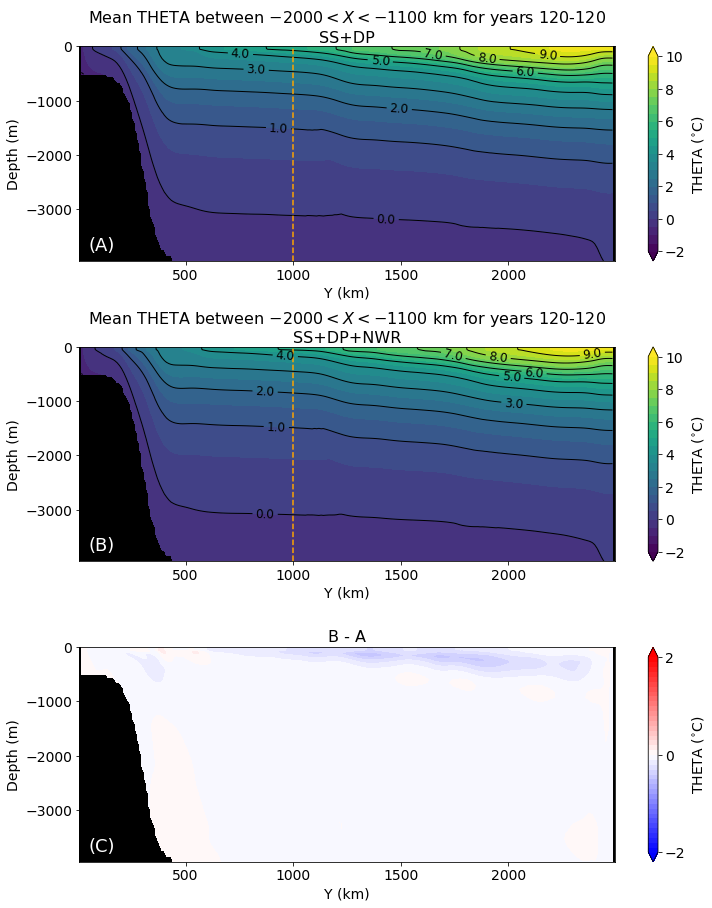

In [18]:
imp.reload(hf)
imp.reload(pf)

xr = [-2000e3, -1100e3]
clvls = np.arange(-2, 10.01, 0.5)
clvls_ano = np.arange(-2, 2.1, 0.1)
vname = 'THETA'
pf.plot_zonal_sect_anom(exp_names, vname, xr=xr, tr=tr, clvls=clvls, exp_names_alias=exp_names_alias, 
                        clvls_ano=clvls_ano, cmap=plt.cm.viridis, fz=14, plot_prtb=True, plot_MLD=False)

comment...

# Meridional heat flux

### Zonally integrated

Loading THETA for years 120-120...
Loading VVEL for years 120-120...
Loading THETA for years 120-120...
Loading VVEL for years 120-120...


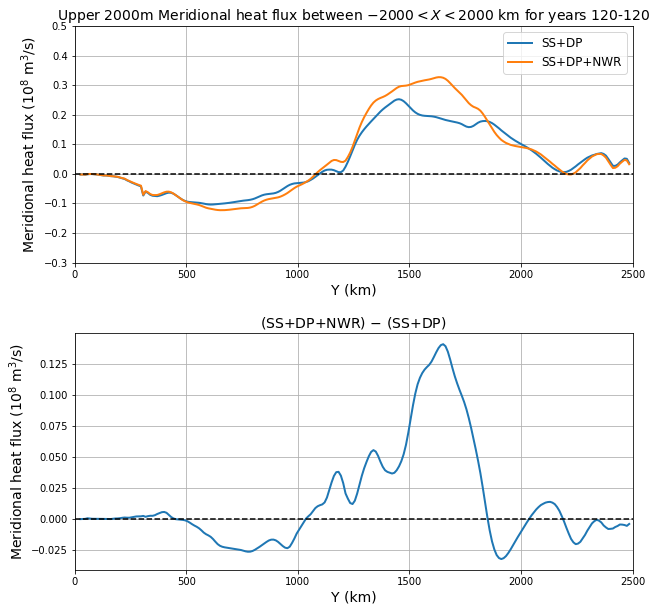

In [19]:
# imp.reload(pf)
xr = [-2000e3, 2000e3]
zr = [-2000, 0]
pf.plot_vT(exp_names, tr, xr, zr, exp_names_alias=exp_names_alias, ylim=[-0.3, 0.5])

### Atlantic sector

In [51]:
# imp.reload(pf)
# xr = [-1000e3, 1500e3]
# zr = [-5000, 0]
# pf.plot_vT(exp_names, tr, xr, zr, exp_names_alias=exp_names_alias, ylim=[-4, 3])

### Pacific sector

In [17]:
# imp.reload(pf)
# xr = [-2000e3, -1000e3]
# zr = [-2000, 0]
# pf.plot_vT(exp_names, tr, xr, zr, exp_names_alias=exp_names_alias, ylim=[-3, 3])

# Overturning circulation

In [21]:
##------------uncomment below to compute overturning streamfunctions----------------##
imp.reload(of)
of.calcOverturning(exp_names[0], tr=tr)
of.calcOverturning(exp_names[1], tr=tr)
#of.calcOverturning(exp_names[0], tr=[80, 85])

creating grid for vertical positions...
Loading flux output...
Loading LaVH1TH for years 120-120...
Loading LaHs1TH for years 120-120...
Loading THETA for years 120-120...
Loading VVEL for years 120-120...
Interpolating temp to finer grid...
Computing streamfunction...


/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:246: RuntimeWarning: invalid value encountered in greater
  pt_f_i1 = pt_f>ptlevs[Npt] # note: this is a boolean array but numpy flips values to int during calculations
/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:248: RuntimeWarning: invalid value encountered in less_equal
  pt_f_i2 = pt_f<=ptlevs[1]
/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:290: RuntimeWarning: Mean of empty slice
  pt_f_xtavg = np.nanmean(pt_f, axis=0)


mapping streamfunction back to z-coords...
creating grid for vertical positions...
Loading flux output...
Loading LaVH1TH for years 120-120...
Loading LaHs1TH for years 120-120...
Loading THETA for years 120-120...
Loading VVEL for years 120-120...
Interpolating temp to finer grid...
Computing streamfunction...


/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:246: RuntimeWarning: invalid value encountered in greater
  pt_f_i1 = pt_f>ptlevs[Npt] # note: this is a boolean array but numpy flips values to int during calculations
/central/home/earlew/research/scripts/MITgcm_py/overturning_funcs.py:248: RuntimeWarning: invalid value encountered in less_equal
  pt_f_i2 = pt_f<=ptlevs[1]


mapping streamfunction back to z-coords...


### Residual overturning in z-coordinates

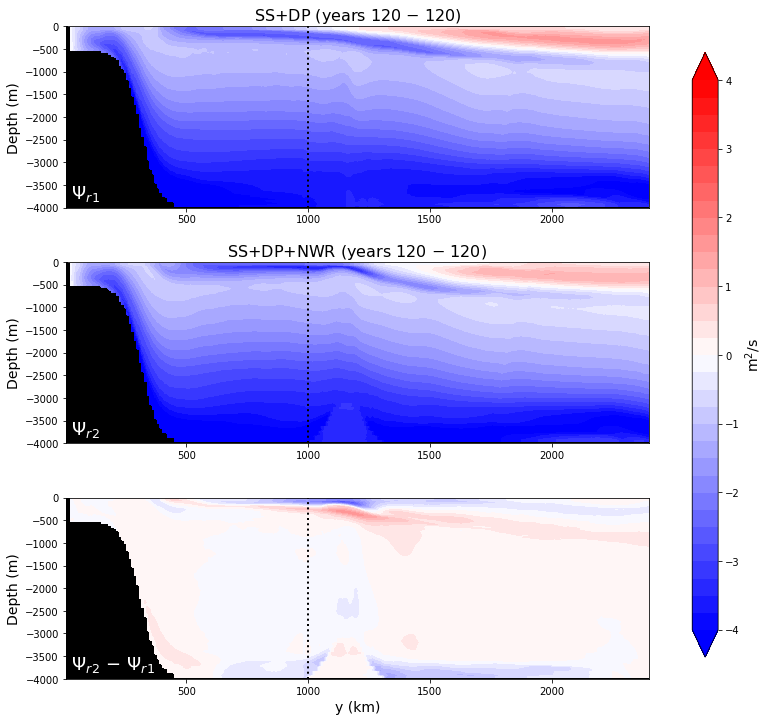

In [3]:
imp.reload(of)
imp.reload(pf)

clvls = np.arange(-4, 4.1, 0.25)
pf.plot_psi_z_comp(exp_names, tr=tr, exp_names_alias=exp_names_alias, clvls=clvls, plot_mode=0)

comment...

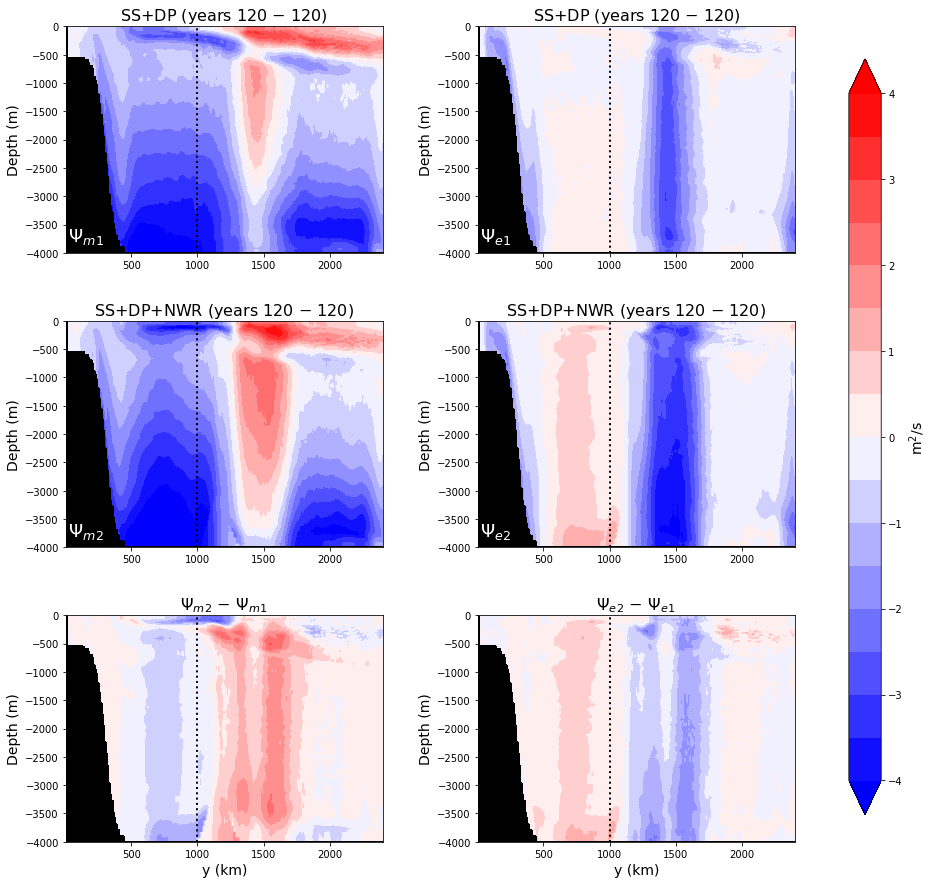

In [4]:
imp.reload(pf)
clvls = np.arange(-4, 4.1, 0.5)
#tr = [200, 210] # year range for averaging
pf.plot_psi_z_comp(exp_names, tr=tr, exp_names_alias=exp_names_alias, clvls=clvls, plot_mode=1)

...

### Residual overturning in temperature-coordinates

In [20]:
# imp.reload(of)
# imp.reload(pf)
# clvls = np.arange(-4, 4.1, 0.5)
# pf.plot_psi_pt_comp(exp_names, tr, exp_names_alias=exp_names_alias,clvls=clvls)

...

In [22]:
# imp.reload(pf)
# pf.plot_surf_wmt(exp_names, tr=[190, 191], exp_names_alias=exp_names_alias, use_inst_temp=True)

## Miscellaneous code formating (ignore)

In [2]:
%%html
<style>
table {float:left}
</style>